# Data analysis and wrangling: Populism indicators (Alber_Erre)

# Steps taken:
### 1) upload data into a .csv
### 2) delete some columns to focus on political party distributions
### 3) Play with the data to look for patterns (plotting, grouping)
### 4) Create distance matrix
### 5) hierarquical clustering
### 6) plot clustering

In [5]:
# The following is essential to get your matplotlib plots inline, so do not miss this one if you have graphics.

%matplotlib inline

# Some usual imports here
import csv as csv 
import numpy as np
import pandas as pd

raw_data_pol = pd.read_csv('politics_eu_clean_final.csv')
raw_data_pol.head()

len(raw_data_pol)

2556

In [6]:
# Normalize data 1990-present

data_pol = raw_data_pol[raw_data_pol.year >= 1990] 

data_pol.head()

,country,wing,populism,year,party,number_votes,number_senators,total_senator,new_party,senator_distribution
13,Austria,left,0,1990,Social_Democratic_Party_of_Austria,42.8,80,183,0,0.44
14,Austria,left,0,1994,Social_Democratic_Party_of_Austria,34.9,65,183,0,0.36
15,Austria,left,0,1995,Social_Democratic_Party_of_Austria,38.1,71,183,0,0.39
16,Austria,left,0,1999,Social_Democratic_Party_of_Austria,33.2,65,183,0,0.36
17,Austria,left,0,2002,Social_Democratic_Party_of_Austria,36.5,69,183,0,0.38


In [7]:
# Let's set "year" as the index of the table
# data_pol.set_index('year')

In [8]:
# Comentar en el report que tuvimos que cambiar el formato de varios parametros 
# durante el proceso de analysis (de string(object) and numerico (float/int) 

data_pol.dtypes

country                  object
wing                     object
populism                  int64
year                      int64
party                    object
number_votes             object
number_senators          object
total_senator             int64
new_party                 int64
senator_distribution    float64
dtype: object

# Basic statistics of the data and its distribution (very interesting for the report)

### Percentage of populism parties, new parties, and wing for ALL the dataset 
(based in election years, not countries as a whole)


In [9]:
# Distribucion del valor populista (porcentajes)
data_pol.populism.value_counts(normalize = True)

0    0.68448
1    0.31552
Name: populism, dtype: float64

In [10]:
# Distribucion del valor new party (percentages)
data_pol.new_party.value_counts(normalize = True)


0    0.676521
1    0.323479
Name: new_party, dtype: float64

In [11]:
## Como saber cuantos partidos políticos hay en toda europa, contar unicos valores en la serie
# para ver una lista de todos estos valores usar, data_pol.party.unique()
# para ver el numero de valores unicos (partidos), usar lo siguiente:

data_pol.party.nunique() # igual que el otro pero con una n

# hay 232 partidos diferentes en la UE


231

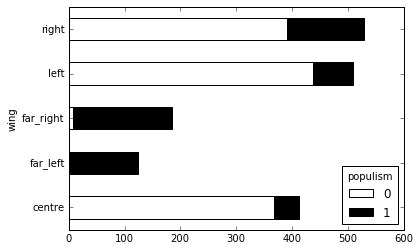

In [12]:
# Valores cruzados de los partidos politicos y su orientacion (derecha - izquierda)

papasito = pd.crosstab(data_pol.wing, data_pol.populism)

papasito.plot.barh(stacked = True, colormap='Greys');


In [13]:
# valores partidos populistas y partidos nuevos (SUPER INTEREZANTE)

# En este sentido, los nuevos partidos no suelen ser populistas
new_populism = pd.crosstab(data_pol.populism, data_pol.new_party)
new_populism






new_party,0,1
populism,,
0,879,325
1,311,244


In [14]:
1759                                

1759

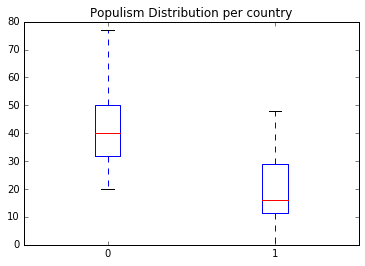

In [15]:
country_populism = pd.crosstab(data_pol.country, data_pol.populism)

country_populism.plot.box(title='Populism Distribution per country')

# Aqui se puede ver que el numero de paises populistas es menor
# La distribución de los paises populistas NO es simetrica (la raya roja no esta en el centro del rectangulo), en los no populisas, si.
# 

# Buscar como poner esta gráfica en orden para ver cuales son los paises con mayor numero de partidos populistas





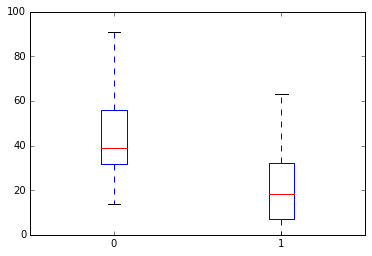

In [16]:
country_new_party = pd.crosstab(data_pol.country, data_pol.new_party)

country_new_party.plot(kind = 'box')

In [17]:
# Basic indicator, mean, this show us that the 30% of all elections year since 1990
data_pol.populism.mean()


0.31552018192154635

# Filtros multiples, si señor, se puede!! (and / or)


# Inestability_Filter = Partidos populistas > 25% camara


In [18]:
Inestability_filter = data_pol[(data_pol.populism == 1) & (data_pol.senator_distribution >= 0.25)] 
Inestability_filter


,country,wing,populism,year,party,number_votes,number_senators,total_senator,new_party,senator_distribution
58,Austria,far_right,1,1999,Freedom_Party_of_Austria,26.9,52,183,0,0.28
594,Czech_Republic,right,1,1992,Civic_Democratic_Party,29.7,76,200,0,0.38
595,Czech_Republic,right,1,1996,Civic_Democratic_Party,29.6,68,200,0,0.34
596,Czech_Republic,right,1,1998,Civic_Democratic_Party,27.7,63,200,0,0.32
597,Czech_Republic,right,1,2002,Civic_Democratic_Party,24.5,58,200,0,0.29
598,Czech_Republic,right,1,2006,Civic_Democratic_Party,35.4,81,200,0,0.41
599,Czech_Republic,right,1,2010,Civic_Democratic_Party,20.2,53,200,0,0.27
1271,Greece,far_left,1,2015,Coalition_of_the_Radical_Left_(SYRIZA),36.3,149,300,0,0.50
1438,Ireland,right,1,1992,Soldiers_of_Destiny,39.1,68,166,0,0.41
1439,Ireland,right,1,1997,Soldiers_of_Destiny,39.3,77,166,0,0.46


In [19]:
# inestability parties perception (%)
number_inestability_parties = Inestability_filter.country.nunique() # igual que el otro pero con una n
number_inestability_parties


8

In [20]:
Inestability_filter.country.unique()

array(['Austria', 'Czech_Republic', 'Greece', 'Ireland', 'Italy',
       'Lithuania', 'Poland', 'Switzerland'], dtype=object)

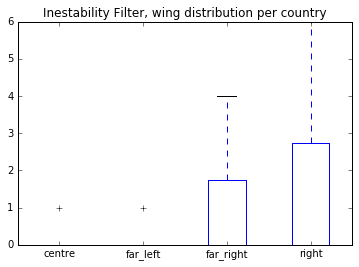

In [21]:
awita = pd.crosstab(Inestability_filter.country, Inestability_filter.wing)

awita.plot(kind = 'box',title='Inestability Filter, wing distribution per country')

In [22]:
# Percentage of Inestability Parties regardint the total
# No es muy preocupante, redondea el 7% del total
Percentage_number_inestability_parties = (number_inestability_parties/28)*100
Percentage_number_inestability_parties

28.57142857142857

# Que pasa si analizamos solo a partir de 2008 ?

In [23]:
# vamos a centrarnos en la distribucion para los años 2008 y posteriores

post_2008_data = data_pol[(data_pol.year >= 2008)]

post_2008_inestability_filter = post_2008_data[(post_2008_data.populism == 1) & (post_2008_data.senator_distribution >= 0.20)] 

number_post_2008_inestability_parties = post_2008_inestability_filter.party.nunique() # igual que el otro pero con una n

total_post_2008_parties = post_2008_data.party.nunique() # igual que el otro pero con una n

Percentage_post_2008_inestability_parties = (number_post_2008_inestability_parties/total_post_2008_parties)*100

Percentage_post_2008_inestability_parties

# El porcentaje es menor, WTF??? No mencionar esto a menos que se te ocurra algo :D





6.222222222222222

# Radical_Filter = New political parties and populist

In [38]:
# RADICAL_FILTER = Partidos politicos nuevos (1), populistas(1) con exito en las elecciones (>10% parliament)
# De este modo sabemos que paises son los más "radicales"

radical_filter= data_pol[(data_pol.populism == 1) & 
                      (data_pol.new_party == 1) & 
                      (data_pol.senator_distribution >= 0.10)] 


In [39]:
# Party Names:
radical_filter.party.unique()

array(['Alliance_Future_Austria', 'Ataka_(ATAKA)', 'ANO_2011',
       'Movement_for_a_Better_Hungary', 'Movimento_5_Stelle_(MCS)',
       'Order_and_Justice', 'Labour_Party', 'Freedom_Party',
       'Peoples_Party__Dan_Diaconescu', 'Freedom_and_Solidarity',
       'United_We_Can_(PODEMOS)', 'Podemos'], dtype=object)

In [40]:
# Numero de partidos de este tipo:
number_radical_parties = radical_filter.party.nunique() # igual que el otro pero con una n
number_radical_parties


12

In [41]:
# Percentage of this parties between all parties

Percentage_number_radical_parties = (12/229)*100
Percentage_number_radical_parties

# usamos los años como index (como eje)



5.240174672489083

# Agregamos las variables para reducir su dimension (dimension reduction) para operar y crear la matriz de distancias/covarianzas


In [28]:
# Multi filter criteria !! (agregar varias variables para seleccionar valores comunes)



In [29]:
# utilizamos "groupBy" y .agg para operar


# Hierarchical clustering


In [30]:
papaso = data_pol.country.unique()
papaso

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Czech_Republic',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
       'Netherland', 'Poland', 'Portugal', 'Rumania', 'Slovakia',
       'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'United_Kingdom',
       'Norway'], dtype=object)

Let's do the clustering and plot the result


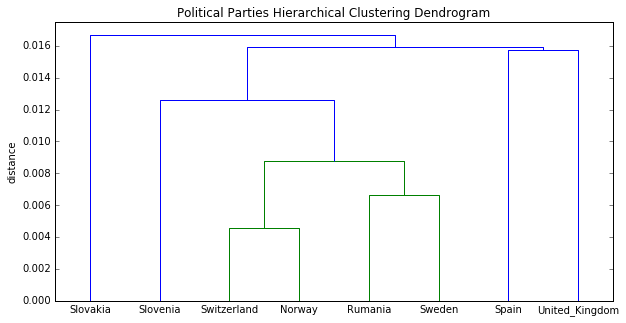

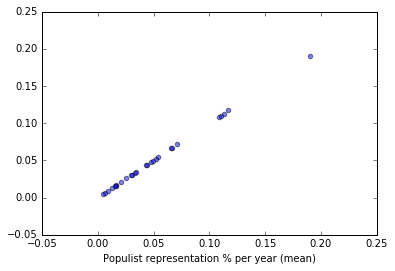

In [42]:
## FIRST TRY, the second is the GOOD ONE!

import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt

#Series

# Como cada punto es un año, no puedo calcular que pais es mas populista
# PERO, lo que puedo hacer es calcular la media de parlamentarios populistas por año (codigo de debajo)
# Y sobre estas medias, hacer una matrix de distancias :D



Austria = data_pol[(data_pol.country == 'Austria') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x1 = Austria.senator_distribution.mean()


Belgium = data_pol[(data_pol.country == 'Belgium') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x2 = Belgium.senator_distribution.mean()


Bulgaria = data_pol[(data_pol.country == 'Bulgaria') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x3 = Bulgaria.senator_distribution.mean()


Croatia = data_pol[(data_pol.country == 'Croatia') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x4 = Croatia.senator_distribution.mean()


Czech_Republic = data_pol[(data_pol.country == 'Czech_Republic') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x5 = Czech_Republic.senator_distribution.mean()


Denmark = data_pol[(data_pol.country == 'Denmark') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x6 = Denmark.senator_distribution.mean()


Estonia = data_pol[(data_pol.country == 'Estonia') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x7 = Estonia.senator_distribution.mean()


Finland = data_pol[(data_pol.country == 'Finland') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x8 = Finland.senator_distribution.mean()


France = data_pol[(data_pol.country == 'France') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x9 = France.senator_distribution.mean()


Germany = data_pol[(data_pol.country == 'Germany') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x10 = Germany.senator_distribution.mean()


Greece = data_pol[(data_pol.country == 'Greece') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x11 = Greece.senator_distribution.mean()


Hungary = data_pol[(data_pol.country == 'Hungary') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x12 = Hungary.senator_distribution.mean()


Ireland = data_pol[(data_pol.country == 'Ireland') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x13 = Ireland.senator_distribution.mean()


Italy = data_pol[(data_pol.country == 'Italy') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x14 = Italy.senator_distribution.mean()


Latvia = data_pol[(data_pol.country == 'Latvia') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x15 = Latvia.senator_distribution.mean()

Lithuania = data_pol[(data_pol.country == 'Lithuania') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x16 = Lithuania.senator_distribution.mean()

Luxembourg = data_pol[(data_pol.country == 'Luxembourg') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x17 = Luxembourg.senator_distribution.mean()

Netherland = data_pol[(data_pol.country == 'Netherland') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x18 = Netherland.senator_distribution.mean()

Poland = data_pol[(data_pol.country == 'Poland') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x19 = Poland.senator_distribution.mean()

Portugal = data_pol[(data_pol.country == 'Portugal') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x20 = Portugal.senator_distribution.mean()

Rumania = data_pol[(data_pol.country == 'Rumania') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x21 = Rumania.senator_distribution.mean()

Slovakia = data_pol[(data_pol.country == 'Slovakia') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x22 = Slovakia.senator_distribution.mean()

Slovenia = data_pol[(data_pol.country == 'Slovenia') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x23 = Slovenia.senator_distribution.mean()

Spain = data_pol[(data_pol.country == 'Spain') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x24 = Spain.senator_distribution.mean()

Sweden = data_pol[(data_pol.country == 'Sweden') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x25 = Sweden.senator_distribution.mean()

Switzerland = data_pol[(data_pol.country == 'Switzerland') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x26 = Switzerland.senator_distribution.mean()

United_Kingdom = data_pol[(data_pol.country == 'United_Kingdom') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x27 = United_Kingdom.senator_distribution.mean()

Norway = data_pol[(data_pol.country == 'Norway') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x28 = Norway.senator_distribution.mean()

# first we need the covariance matrix or distance matrix
#papaso = "usar cov matrix aqui"
paises_distances = [x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28]

# Dendogram
Z = hac.linkage(paises_distances, 'single', 'correlation')

plt.figure(figsize=(10, 5))
plt.title('Political Parties Hierarchical Clustering Dendrogram')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_font_size=10.,  # font size for the x axis labels
    labels = papaso # Vector with names
)
plt.show()

#Scatter plot
plt.scatter(paises_distances, paises_distances, alpha=0.5)
plt.xlabel('Populist representation % per year (mean)')
plt.show()

# cluster line
#cluster = hac.linkage(papaso, 'single', 'correlation')



In [32]:
paises_distances = [x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28]
paises_distances


[0.05437500000000001,
 0.012571428571428574,
 0.015925925925925927,
 0.006666666666666667,
 0.11281249999999998,
 0.06687500000000002,
 nan,
 0.07142857142857142,
 0.016666666666666666,
 0.03071428571428572,
 0.0438888888888889,
 0.025714285714285714,
 0.18999999999999997,
 0.11708333333333332,
 0.043333333333333335,
 0.03406250000000001,
 0.05200000000000001,
 0.03357142857142857,
 0.10875000000000001,
 0.047500000000000014,
 0.015714285714285715,
 0.029722222222222223,
 0.00875,
 0.02125000000000001,
 0.0492857142857143,
 0.06607142857142859,
 0.004583333333333333,
 0.11000000000000003]

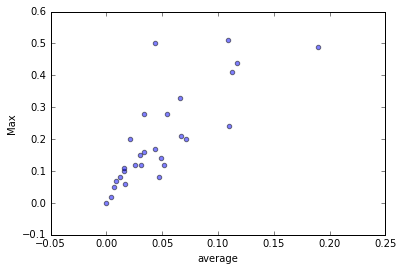

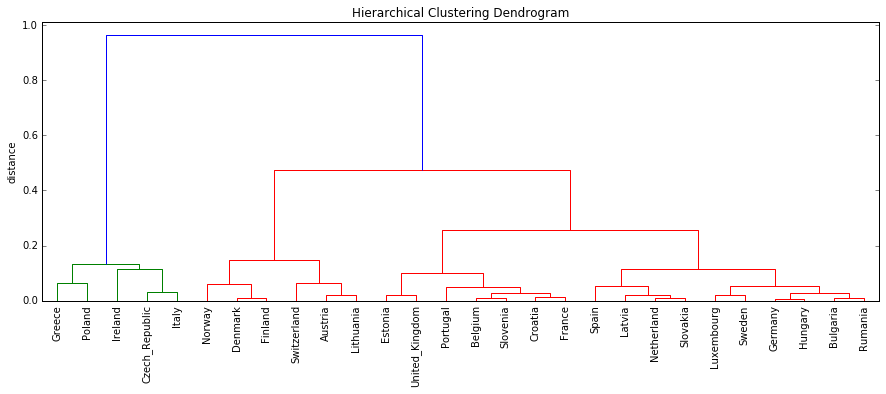

In [43]:
# THIS ONE IS THE REAL ONE, the good one!!

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram


Austria = data_pol[(data_pol.country == 'Austria') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x1a = Austria.senator_distribution.mean()
x1b = Austria.senator_distribution.max()

Belgium = data_pol[(data_pol.country == 'Belgium') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x2a = Belgium.senator_distribution.mean()
x2b = Belgium.senator_distribution.max()

Bulgaria = data_pol[(data_pol.country == 'Bulgaria') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x3a = Bulgaria.senator_distribution.mean()
x3b = Bulgaria.senator_distribution.max()

Croatia = data_pol[(data_pol.country == 'Croatia') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x4a = Croatia.senator_distribution.mean()
x4b = Croatia.senator_distribution.max()

Czech_Republic = data_pol[(data_pol.country == 'Czech_Republic') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x5a = Czech_Republic.senator_distribution.mean()
x5b = Czech_Republic.senator_distribution.max()

Denmark = data_pol[(data_pol.country == 'Denmark') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x6a = Denmark.senator_distribution.mean()
x6b = Denmark.senator_distribution.max()

Estonia = data_pol[(data_pol.country == 'Estonia') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x7a = Estonia.senator_distribution.mean()
x7b = Estonia.senator_distribution.max()

Finland = data_pol[(data_pol.country == 'Finland') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x8a = Finland.senator_distribution.mean()
x8b = Finland.senator_distribution.max()

France = data_pol[(data_pol.country == 'France') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x9a = France.senator_distribution.mean()
x9b = France.senator_distribution.max()

Germany = data_pol[(data_pol.country == 'Germany') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x10a = Germany.senator_distribution.mean()
x10b = Germany.senator_distribution.max()

Greece = data_pol[(data_pol.country == 'Greece') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x11a = Greece.senator_distribution.mean()
x11b = Greece.senator_distribution.max()

Hungary = data_pol[(data_pol.country == 'Hungary') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x12a = Hungary.senator_distribution.mean()
x12b = Hungary.senator_distribution.max()

Ireland = data_pol[(data_pol.country == 'Ireland') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x13a = Ireland.senator_distribution.mean()
x13b = Ireland.senator_distribution.max()

Italy = data_pol[(data_pol.country == 'Italy') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x14a = Italy.senator_distribution.mean()
x14b = Italy.senator_distribution.max()

Latvia = data_pol[(data_pol.country == 'Latvia') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x15a = Latvia.senator_distribution.mean()
x15b = Latvia.senator_distribution.max()

Lithuania = data_pol[(data_pol.country == 'Lithuania') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x16a = Lithuania.senator_distribution.mean()
x16b = Lithuania.senator_distribution.max()

Luxembourg = data_pol[(data_pol.country == 'Luxembourg') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x17a = Luxembourg.senator_distribution.mean()
x17b = Luxembourg.senator_distribution.max()

Netherland = data_pol[(data_pol.country == 'Netherland') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x18a = Netherland.senator_distribution.mean()
x18b = Netherland.senator_distribution.max()

Poland = data_pol[(data_pol.country == 'Poland') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x19a = Poland.senator_distribution.mean()
x19b = Poland.senator_distribution.max()

Portugal = data_pol[(data_pol.country == 'Portugal') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x20a = Portugal.senator_distribution.mean()
x20b = Portugal.senator_distribution.max()

Rumania = data_pol[(data_pol.country == 'Rumania') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x21a = Rumania.senator_distribution.mean()
x21b = Rumania.senator_distribution.max()

Slovakia = data_pol[(data_pol.country == 'Slovakia') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x22a = Slovakia.senator_distribution.mean()
x22b = Slovakia.senator_distribution.max()

Slovenia = data_pol[(data_pol.country == 'Slovenia') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x23a = Slovenia.senator_distribution.mean()
x23b = Slovenia.senator_distribution.max()

Spain = data_pol[(data_pol.country == 'Spain') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x24a = Spain.senator_distribution.mean()
x24b = Spain.senator_distribution.max()

Sweden = data_pol[(data_pol.country == 'Sweden') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x25a = Sweden.senator_distribution.mean()
x25b = Sweden.senator_distribution.max()

Switzerland = data_pol[(data_pol.country == 'Switzerland') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x26a = Switzerland.senator_distribution.mean()
x26b = Switzerland.senator_distribution.max()

United_Kingdom = data_pol[(data_pol.country == 'United_Kingdom') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x27a = United_Kingdom.senator_distribution.mean()
x27b = United_Kingdom.senator_distribution.max()

Norway = data_pol[(data_pol.country == 'Norway') & (data_pol.year >= 1990) & (data_pol.populism == 1)] 
x28a = Norway.senator_distribution.mean()
x28b = Norway.senator_distribution.max()

mean_max_countries = [[x1a, x1b],
     [x2a, x2b],
     [x3a, x3b],
     [x4a, x4b],
     [x5a, x5b],
     [x6a, x6b],
     [0, 0],
     [x8a, x8b],
     [x9a, x9b],
     [x10a, x10b],
     [x11a, x11b],
     [x12a, x12b],
     [x13a, x13b],
     [x14a, x14b],
     [x15a, x15b],
     [x16a, x16b],
     [x17a, x17b],
     [x18a, x18b],
     [x19a, x19b],
     [x20a, x20b],
     [x21a, x21b],
     [x22a, x22b],
     [x23a, x23b],
     [x24a, x24b],
     [x25a, x25b],
     [x26a, x26b],
     [x27a, x27b],
     [x28a, x28b],
     ]

type(mean_max_countries)
# list --> array
mean_max_countries_array = np.asarray(mean_max_countries)

# Plot 2d scatter map
plt.scatter(mean_max_countries_array[:,0], mean_max_countries_array[:,1], alpha=0.5)
plt.xlabel('average')
plt.ylabel('Max')
plt.show()

# Hierarchical clustering algorithm
Z = linkage(mean_max_countries_array, 'ward')

plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=10.,  # font size for the x axis labels
    labels = papaso # Vector with names
)
plt.show()

In [48]:
# FINAL RESULT IN THE CELL ABOVE!!! (check charts, there are 2, a scatter plot and a hierarchical dendrogram)